Helena Pato Magalhães - 2017095723

Rafael Gonçalves de Oliveira - 2017014685

# Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. A maioria das pessoas gostaria que aquele produto que tanto admira seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é inferior. Porém, muitos trabalhos independem da opinião de um especialista para ganharem o coração do público. Os Video Games não são uma excessão. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

De outro modo, podemos analisar também mais um aspecto que influencia enormemente no êxito comercial de um Video Game, seu gênero. É sabido que jogos violentos normalmente são o centro das atenções, mas existem vários outros tipos de jogos que bombam no mercado. Isso também traz uma reflexão em relação às populações que consomem a maior quantidade de um determinado gênero de entretenimento, já que de uma forma ou de outra, esses elementos influenciam na formação do jogador.

# Metodologia

Para analisar essas relações, utilizamos uma [base de dados](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/version/2) sobre Video Games que venderam pelo menos 10 000 cópias, entre 1980 e 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Essa base de dados inclui os seguintes elementos:

| Atributo     | Significado                                                                                            |
|--------------|--------------------------------------------------------------------------------------------------------|
| Name         | Nome do Jogo                                                                                           |
| Platform     | Console para o qual o jogo foi lançado                                                                 |
| Year         | Ano de lançamento do jogo                                                                              |
| Genre        | Gênero do jogo                                                                                         |
| Publisher    | Empresa responsável por publicar o jogo                                                                |
| NA_Sales     | Vendas na América do Norte (em milhões de unidades)                                                    |
| EU_Sales     | Vendas na Europa (em milhões de unidades)                                                              |
| JP_Sales     | Vendas no Japão (em milhões de unidades)                                                               |
| Other_Sales  | Vendas no resto do mundo (em milhões de unidades)                                                      |
| Global_Sales | Vendas totais no mundo (em milhões de unidades)                                                        |
| Critic_score | Pontuação agregada compilada pelos funcionários do site [Metacritic](https://www.metacritic.com/)      |
| Critic_count | Número de críticos usado para gerar Critic_score                                                       |
| User_score   | Pontuação dada pelos usuários do site Metacritic                                                       |
| User_count   | Número de usuários que votaram na User_score                                                           |
| Developer    | Desenvolvedores do jogo                                                                                |
| Rating       | Classificação indicativa dada pela [ESRB](https://www.esrb.org/) (Entertainment Software Rating Board) |

O modelo utilizado para avaliar a relação entre a avaliação dos críticos e as vendas globais foi a regressão linear simples, já que, pelos gráficos gerados a relação parecia aproximadamente linear, além de que queríamos relacionar apenas esses dois aspectos. Já para vermos como o gênero influencia nas vendas em cada parte do mundo, utilizamos um classificador kNN, que tentaria prever a qual gênero (classe) pertence o jogo de acordo com suas vendas nessas regiões geográficas.

# Resultados

## Caracterização

Inicialmente temos a apresentação dos dados, em forma de tabela para melhor visualização. Os jogos estão ordenados de forma decrescente em relação às vendas globais, e de cara já podemos ver a disparidade entre o primeiro e o segundo colocados. O primeiro, _Wii Sports_, tem mais do que o dobro de cópias vendidas do que o segundo, _Super Mario Bros_. Isso occoreu pois o _Wii Sports_ era vendido juntamente com o seu console, _Nintendo Wii_, assim essas vendas representam mais o consumo do console do que do jogo específico.

In [1]:
import pandas as pd

videogames = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Dessa forma, decidimos remover esse jogo da base.

In [2]:
videogames.drop([0], inplace=True)
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN


Ao observarmos algumas estatísticas iniciais dos dados, notamos que o campo `User_Score` não estava sendo exibido.

In [3]:
videogames.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16449.000000,16718.000000,16718.000000,16718.000000,16718.000000,16718.000000,8136.000000,8136.000000,7589.000000
mean,2006.487385,0.260872,0.143301,0.077381,0.046829,0.528638,68.966814,26.357793,162.208855
std,5.879172,0.748871,0.451263,0.307504,0.175040,1.412102,13.938803,18.979695,561.316313
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,29.080000,12.760000,10.220000,10.570000,40.240000,98.000000,113.000000,10665.000000


Checamos que os valores estavam no formato de string, por isso não estavam sendo usados nos cálculos.

In [4]:
type(videogames['User_Score'][2])

str

Dessa forma, foi necessário convertê-los para numéricos.

In [5]:
videogames['User_Score'] = pd.to_numeric(videogames['User_Score'], errors='coerce')
videogames.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16449.000000,16718.000000,16718.000000,16718.000000,16718.000000,16718.000000,8136.000000,8136.000000,7589.000000,7589.000000
mean,2006.487385,0.260872,0.143301,0.077381,0.046829,0.528638,68.966814,26.357793,7.124931,162.208855
std,5.879172,0.748871,0.451263,0.307504,0.175040,1.412102,13.938803,18.979695,1.500071,561.316313
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,29.080000,12.760000,10.220000,10.570000,40.240000,98.000000,113.000000,9.700000,10665.000000


Outro fato curioso é que, teoricamente, os videogames são de 1980 a 2016, mas o valor máximo de `Year_of_Release` é 2020. Portanto decidimos investigar. Encontramos quatro instâncias de jogos fora da data prevista.

In [6]:
videogames[videogames['Year_of_Release'] > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Decidimos descartá-los, mantendo somente aqueles dentro do intervalo citado.

In [7]:
videogames.drop(videogames[videogames['Year_of_Release'] > 2016].index, inplace=True)
videogames.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16445.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,8136.000000,8136.000000,7589.000000,7589.000000
mean,2006.484646,0.260918,0.143336,0.077396,0.046839,0.528744,68.966814,26.357793,7.124931,162.208855
std,5.877227,0.748952,0.451311,0.307539,0.175059,1.412253,13.938803,18.979695,1.500071,561.316313
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,29.080000,12.760000,10.220000,10.570000,40.240000,98.000000,113.000000,9.700000,10665.000000


Agora, damos uma olhada um pouco mais profunda nas estatísticas dos dados, explicando cada aspecto observado com os gráficos abaixo. 

Uma característica a se notar é que o número de avaliações de críticos é praticamente a metade do número de jogos, assim muitos jogos não tinham avaliação no site Metacritic.

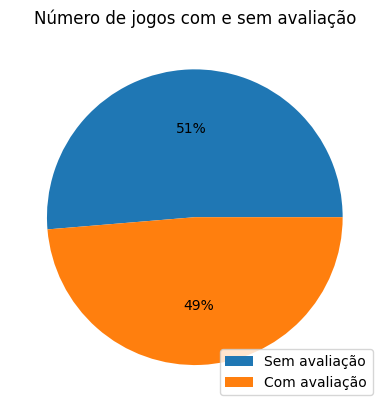

In [8]:
import matplotlib.pyplot as plt

total = videogames['Name'].count()
avaliados = videogames['Critic_Score'].count()

plt.pie([total - avaliados, avaliados], autopct='%1.0f%%')
plt.title('Número de jogos com e sem avaliação')
plt.legend(['Sem avaliação', 'Com avaliação'])

Podemos perceber que a maior parte dos jogos foi lançado entre 2003 e 2010.

Text(0, 0.5, 'Vendas globais')

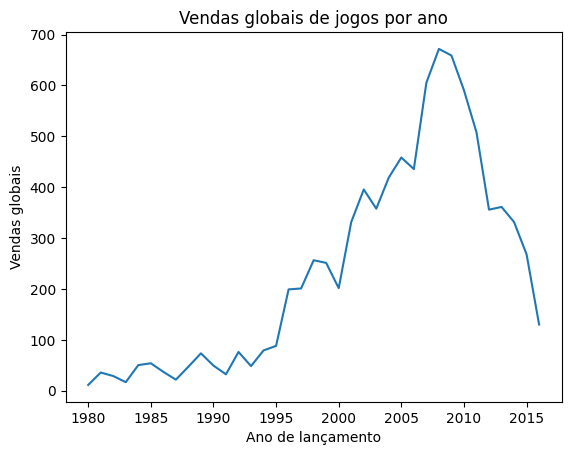

In [9]:
vendas_ano = videogames[['Year_of_Release', 'Global_Sales']].groupby('Year_of_Release').sum()

plt.plot(vendas_ano)
plt.title('Vendas globais de jogos por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas globais')

Isso pode ser explicado pelo fato de que vários dos consoles presentes na lista foram lançados nessa época (_Nintendo DS - 2004, PlayStation 3 - 2006, Nintendo Wii - 2006, Xbox 360 - 2005, PlayStation Portable - 2004_), em que os Video Games estavam se tornando interesse do público mais geral.

<Axes: title={'center': 'Número de jogos por plataforma'}, xlabel='Plataforma'>

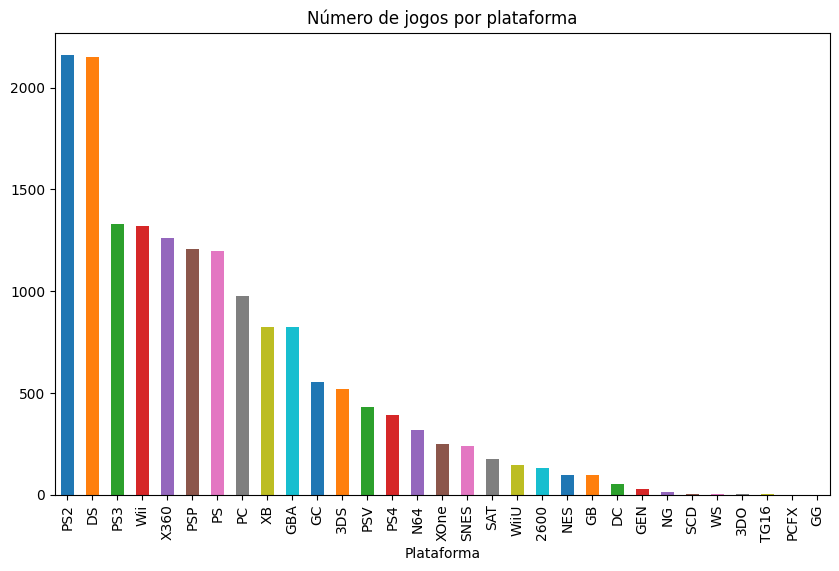

In [10]:
jogos_plataforma = videogames.groupby('Platform').count()['Name'].sort_values(ascending=False)

default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

jogos_plataforma.plot.bar(
    color=default_colors,
    figsize=(10,6),
    title='Número de jogos por plataforma',
    xlabel='Plataforma'
)

Podemos perceber também que, apesar de alguns jogos venderem até 40 milhões, a maioria absoluta vendeu entre 0,01 e 10 milhões.

Text(0, 0.5, 'Frequência')

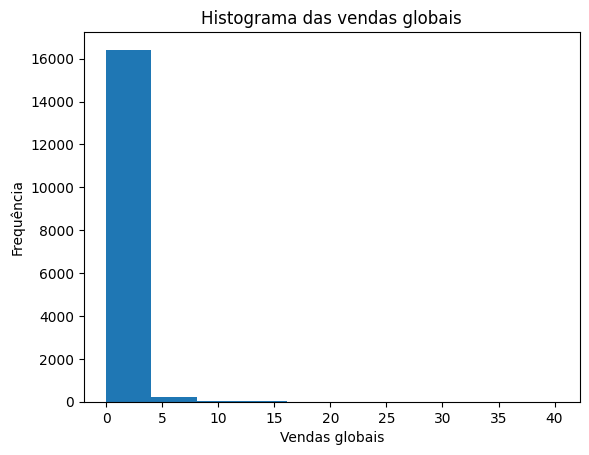

In [11]:
vendas_globais = videogames['Global_Sales']

plt.hist(vendas_globais)
plt.title('Histograma das vendas globais')
plt.xlabel('Vendas globais')
plt.ylabel('Frequência')

(0.0, 10.0)

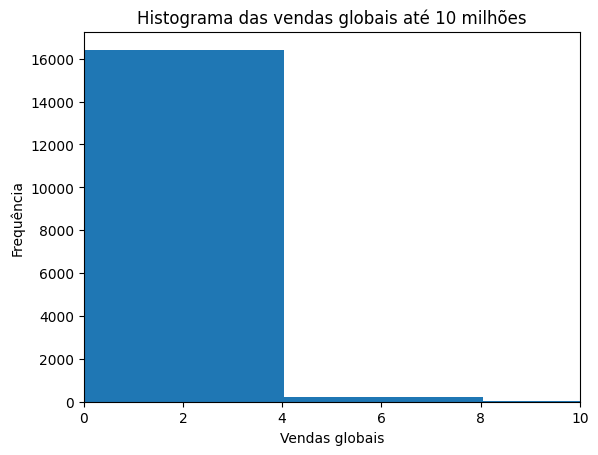

In [12]:
plt.hist(vendas_globais)
plt.title('Histograma das vendas globais até 10 milhões')
plt.xlabel('Vendas globais')
plt.ylabel('Frequência')

ax = plt.gca()
ax.set_xlim([0, 10])

Quanto às avaliações dos críticos, como o esperado, é majoritariamente mediana, entre 60 e 79 pontos (em um total de 100).

Text(0, 0.5, 'Frequência')

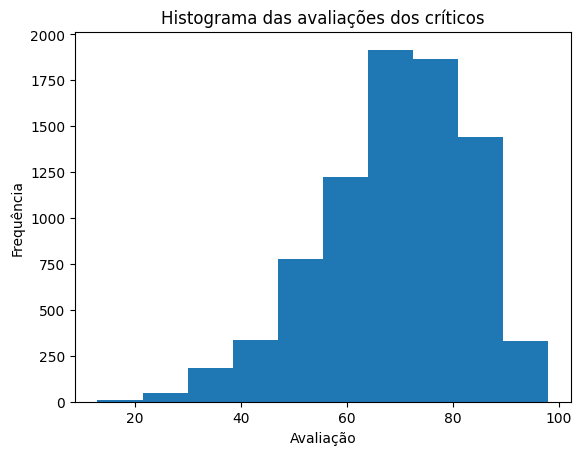

In [13]:
avaliacoes = videogames['Critic_Score']

plt.hist(avaliacoes)
plt.title('Histograma das avaliações dos críticos')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')

No gráfico abaixo, podemos visualizar qual a quantidade de jogos de cada gênero no nosso conjunto de dados. Os jogos de ação lideram sem muita concorrência. Os jogos de esportes que vêm em seguida, ainda possuem uma boa vantagem sobre os demais. Depois, o resto se distribui mais uniformemente. Por fim, os jogos de puzzle são os menos contemplados.

<Axes: title={'center': 'Número de jogos por gênero'}, xlabel='Gênero'>

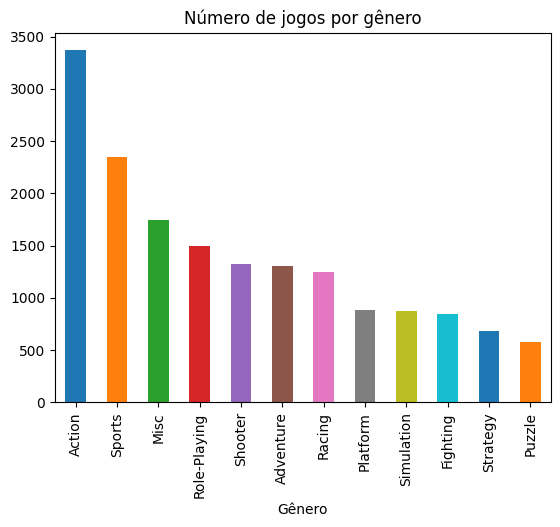

In [14]:
jogos_genero = videogames.groupby('Genre').count()['Name'].sort_values(ascending=False)

jogos_genero.plot.bar(
    title='Número de jogos por gênero',
    color=default_colors,
    xlabel='Gênero'
)

Em relação às classificações indicativas, primeiramente podemos notar que `EC`, `K-A`, `RP` e `AO` tem um número inexpressivo de instâncias. `K-A` (_kids to adults_) é um termo antigo para `E` (_everyone_), enquanto `EC` (_early childhood 3+_) caiu em desuso, sendo também incorporado à faixa `E`. Portanto trocamos os rótulos para os novos. Já `AO` (_adults only_) e `RP` (_rating pending_) não correspondem a outro valor.

In [15]:
rating = videogames.groupby('Rating').count()['Name'].sort_values(ascending=False)
rating

Rating
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Name, dtype: int64

In [16]:
videogames.loc[videogames['Rating'] == 'K-A', 'Rating'] = 'E'
videogames.loc[videogames['Rating'] == 'EC', 'Rating'] = 'E'

Ao desenharmos um gráfico, percebemos a predominância da faixa `E`, seguida de `T` (_teen_) e `M` (_mature_), e finalmente `E10+` (_everyone 10+_). É surpreendente que as faixas `T` e `M` estejam em maior quantidade do que `E10+`, já que o público dos jogos é majoritariamente jovem.

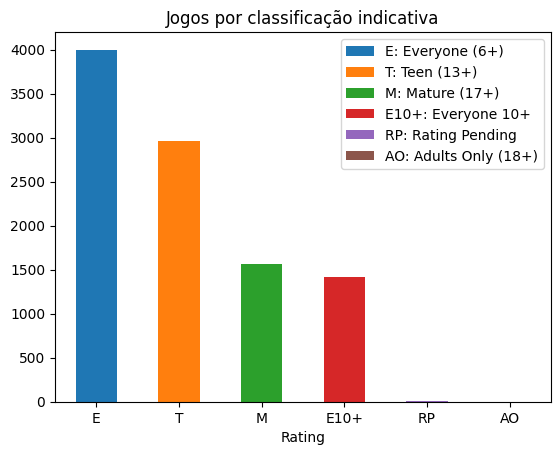

In [17]:
rating = videogames.groupby('Rating').count()['Name'].sort_values(ascending=False)

ax = rating.plot.bar(
    color=default_colors,
    title='Jogos por classificação indicativa',
    legend=True
)

labels = ['E: Everyone (6+)','T: Teen (13+)','M: Mature (17+)','E10+: Everyone 10+','RP: Rating Pending', 'AO: Adults Only (18+)']

for bar, label in zip(ax.containers[0], labels):
    bar.set_label(label)

plt.legend(labels)
plt.xticks(rotation='horizontal')
pass

## Previsão

### Vendas globais e avaliações dos críticos

Vamos abordar agora a nossa reflexão inicial, será que o número de vendas é influenciado pela avaliação dos críticos? De outro modo, a qualidade do jogo causa um maior sucesso comercial?

O gráfico abaixo ilustra a relação entre essas duas variáveis. Inicialmente parece que as vendas aumentam em conjunto com a nota do jogo.

In [18]:
vendas_avaliacoes = videogames[['Critic_Score', 'Global_Sales']].dropna()
vendas_avaliacoes

,Critic_Score,Global_Sales
2,82.0,35.52
3,80.0,32.77
6,89.0,29.80
7,58.0,28.92
8,87.0,28.32
...,...,...
16700,61.0,0.01
16701,53.0,0.01
16702,48.0,0.01
16706,60.0,0.01


<Axes: title={'center': 'Vendas globais por avaliação dos críticos'}, xlabel='Avaliação dos críticos', ylabel='Vendas globais'>

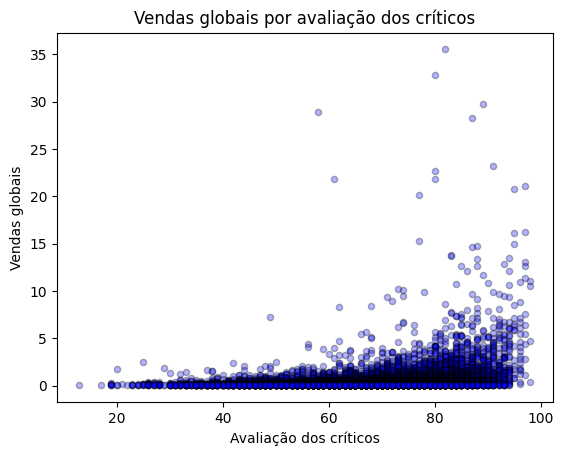

In [19]:
vendas_avaliacoes.plot.scatter(
    x='Critic_Score', 
    y='Global_Sales', 
    color='blue', 
    alpha=0.3, 
    edgecolor='k', 
    title='Vendas globais por avaliação dos críticos',
    xlabel='Avaliação dos críticos',
    ylabel='Vendas globais'
)

(0.0, 5.0)

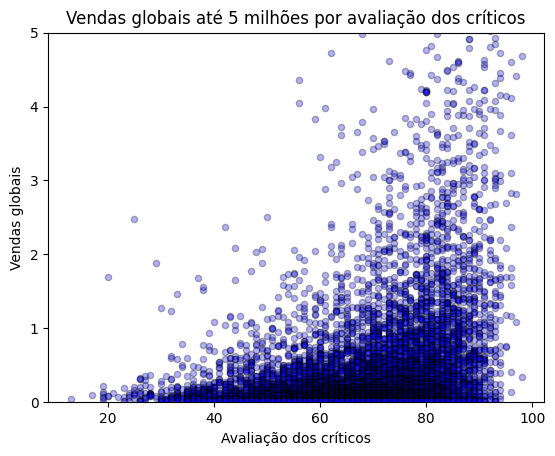

In [20]:
vendas_avaliacoes.plot.scatter(
    x='Critic_Score', 
    y='Global_Sales', 
    color='blue', 
    alpha=0.3, 
    edgecolor='k', 
    title='Vendas globais até 5 milhões por avaliação dos críticos',
    xlabel='Avaliação dos críticos',
    ylabel='Vendas globais'
)

ax = plt.gca()
ax.set_ylim([0, 5])

Agora utilizamos uma regressão linear para tentar prever o comportamento dessa relação.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Escolhi qual variável será X e qual será y e as separei em treino e teste
X = vendas_avaliacoes['Critic_Score'].values
X = X.reshape(-1, 1)
y = vendas_avaliacoes['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelo da regressão linear
model = LinearRegression()
normalize = StandardScaler(with_mean=False)

pipe = make_pipeline(normalize, model)

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)

Podemos ver que o $ R^2 $ ficou bem baixo, e o erro foi significativo, considerando-se que o valor das vendas é em milhões.

In [22]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Avaliando o modelo
print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print("Raiz do erro quadrático médio: %.2f" % root_mean_squared_error(y_test, prediction))
print('r2: %.2f' % r2_score(y_test, prediction)) # r2 = 1: previsão perfeita

Coeficiente:  [0.43966671]
Intercepto:  -1.529944708133072
Raiz do erro quadrático médio: 1.32
r2: 0.10


Quando desenhamos a função gerada, para visualizar o resultado, percebemos que uma função linear não foi capaz de capturar muito bem a tendência dos pontos.

Text(0, 0.5, 'Vendas globais')

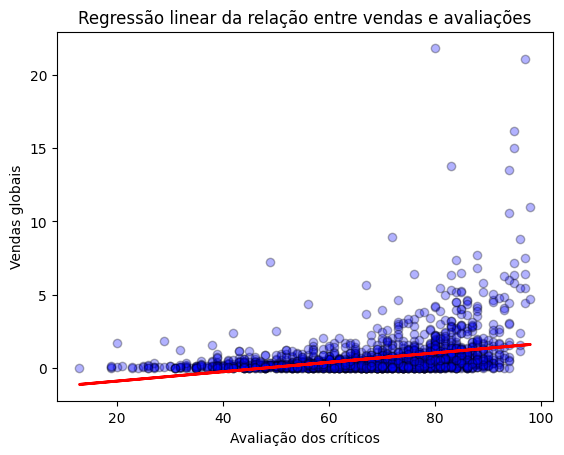

In [23]:
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Regressão linear da relação entre vendas e avaliações')
plt.xlabel('Avaliação dos críticos')
plt.ylabel('Vendas globais')

(0.0, 5.0)

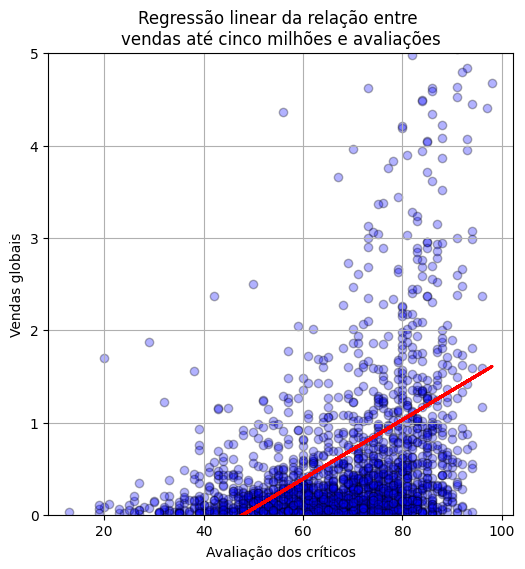

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Regressão linear da relação entre \nvendas até cinco milhões e avaliações')
plt.xlabel('Avaliação dos críticos')
plt.ylabel('Vendas globais')
plt.grid()

ax = plt.gca()
ax.set_ylim([0, 5])

Por fim, faremos um teste de hipótese, por permutação, considerando a hipótese nula como _"A qualidade de um jogo não influencia nas suas vendas"_, ou seja, as vendas são uniformemente distribuídas, independentemente da qualidade. Calculamos então o p-valor para essa hipótese.

In [25]:
from sklearn.model_selection import permutation_test_score

# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(pipe, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 1.0 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e a qualidade do jogo tem, sim uma relação.

### Gênero e vendas por região

Mudando agora para outro tópico, investigaremos o vínculo entre o gênero dos jogos e suas vendas nas várias regiões do mundo. No gráfico abaixo, já podemos ver a predominância de jogos de ação, como já visto anteriormente, mas uma coisa que podemos perceber melhor agora, é como as regiões da América do Norte, Europa e Outras seguem um padrão muito parecido, enquanto o Japão segue outro bastante diferente.

<Axes: title={'center': 'Vendas de jogos por gênero'}, xlabel='Gênero', ylabel='Vendas'>

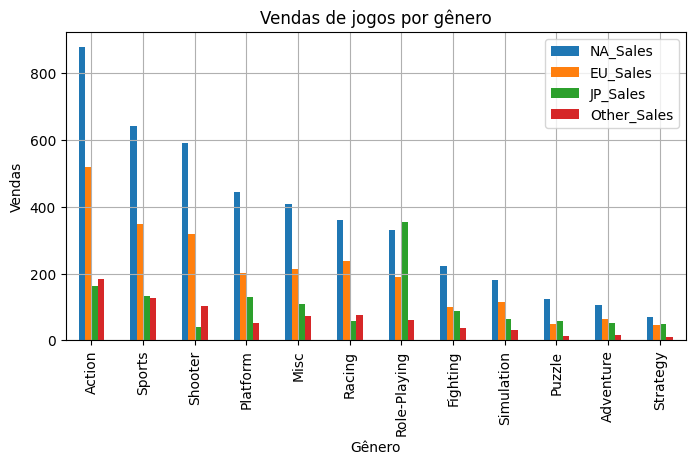

In [26]:
vendas_genero_regiao = videogames[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Genre').sum().sort_values(by='NA_Sales', ascending=False)

vendas_genero_regiao.plot.bar(
    figsize=(8,4),
    title='Vendas de jogos por gênero',
    grid=True,
    xlabel='Gênero',
    ylabel= 'Vendas'
)

Vamos então, usar um classificador kNN para tentar prever, de acordo com as vendas nessas regiões, o gênero de um jogo.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

vendas_genero_regiao_all = videogames[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].dropna()

X = vendas_genero_regiao_all[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = vendas_genero_regiao_all[['Genre']].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier(n_neighbors=9, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

/Users/helena/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Abaixo temos as métricas que avaliaram esse modelo.

In [28]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

acc = accuracy_score(y_test, prediction)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Acurácia: ', acc, '\nPrecisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Acurácia:  0.20105313547151749 
Precisão:  0.1538691324466607 
Revocação:  0.14241556958947896 
F1:  0.1428479383978893
Pontuação da classificação:  0.20105313547151749


As métricas parecem bem ruins, plotamos então uma matriz de confusão para visualizar. Parece que nosso classificador está classificando muitos jogos de outros gêneros como jogos de ação. Isso pode ser dar pela abundância de jogos dese tipo em relação aos outros, já conferida anteriormente.

Text(0.5, 1.0, 'kNN Confusion Matrix')

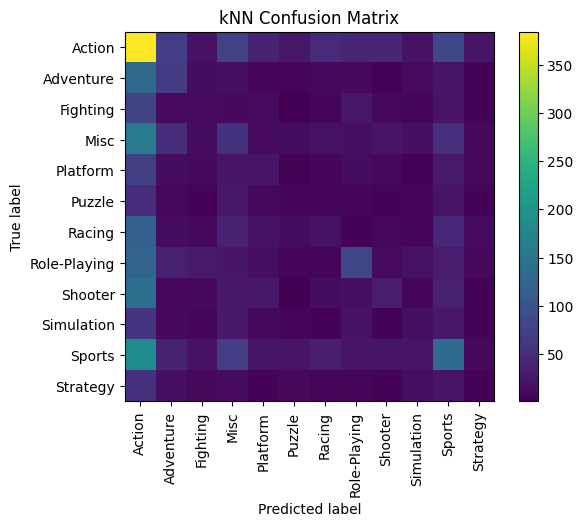

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=model, 
    X=X_test, 
    y=y_test, 
    labels=model.classes_, 
    include_values=False, 
    xticks_rotation='vertical'
)
plt.title('kNN Confusion Matrix')

Para contornar esse problema, fizemos uma amostragem dos dados originais. Selecionamos $n$ instâncias de jogos de cada gênero, com reposição, sendo $n$ a média de jogos de cada gênero.

In [30]:
genres = list(model.classes_)
n_genres = len(genres)
mean_genre = int(jogos_genero.mean())

videogame_samples = [0]*n_genres
for i in range(n_genres):
    videogame_samples[i] = videogames[videogames['Genre'] == genres[i]].sample(mean_genre, replace=True)
videogame_samples = pd.concat(videogame_samples).sample(frac=1)
videogame_samples

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2016,MySims Agents,Wii,2009.0,Adventure,Electronic Arts,0.61,0.32,0.0,0.10,1.03,78.0,28.0,8.6,28.0,Electronic Arts,E
2703,Portal 2,PC,2011.0,Shooter,Valve Software,0.33,0.32,0.0,0.10,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+
4392,Skylanders: Trap Team,PS4,2014.0,Action,Activision,0.19,0.18,0.0,0.07,0.44,78.0,46.0,5.6,32.0,Toys for Bob,E10+
4735,Monster Jam: Urban Assault,Wii,2008.0,Racing,Activision,0.38,0.00,0.0,0.03,0.41,NaN,NaN,7.8,6.0,Torus Games,E
14808,1000 Cooking Recipes from ELLE à table,DS,2010.0,Misc,Nintendo,0.00,0.02,0.0,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,LEGO Racers,PS,1999.0,Racing,LEGO Media,0.20,0.14,0.0,0.02,0.36,NaN,NaN,NaN,NaN,NaN,NaN
7589,Ty the Tasmanian Tiger 2: Bush Rescue,GC,2004.0,Platform,Electronic Arts,0.15,0.04,0.0,0.01,0.20,70.0,20.0,8.6,11.0,Krome Studios,E
15576,Virtual Kasparov,GBA,2002.0,Strategy,Titus,0.01,0.01,0.0,0.00,0.02,70.0,6.0,NaN,NaN,Titus Software,E
16218,Blitzkrieg 2 Anthology,PC,2008.0,Strategy,Ascaron Entertainment GmbH,0.00,0.01,0.0,0.00,0.01,NaN,NaN,NaN,NaN,"1C, Various, 1C Company",NaN


Então treinamos um novo modelo com os dados da amostragem.

In [31]:
X = videogame_samples[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = videogame_samples['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier(n_neighbors=9, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

As métricas resultantes foram melhores.

In [32]:
acc = accuracy_score(y_test, prediction)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Acurácia: ', acc, '\nPrecisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Acurácia:  0.36374521072796934 
Precisão:  0.364378589653601 
Revocação:  0.36379040147209113 
F1:  0.3590674538386042
Pontuação da classificação:  0.36374521072796934


E a matriz de confusão ficou com um diagonal mais pronunciada, ou seja, o modelo está classificando corretamente mais instâncias.

Text(0.5, 1.0, 'Sampled kNN Confusion Matrix')

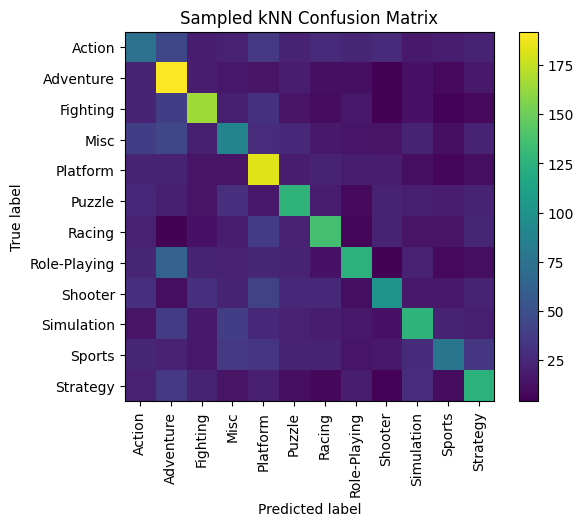

In [33]:
ConfusionMatrixDisplay.from_estimator(
    estimator=model, 
    X=X_test, 
    y=y_test, 
    labels=model.classes_, 
    include_values=False, 
    xticks_rotation='vertical'
)
plt.title('Sampled kNN Confusion Matrix')

Por último, fazemos um teste de hipótese, por permutação, em que a hipótese nula seria a de que _"O gênero não influencia nas vendas do jogo em cada região do globo"_. Novamente, calculamos o p-valor para essa hipótese.

In [34]:
# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 0.7545498084291188 
p-valor : 0.009900990099009901


Com um p-valor reduzido, podemos concluir que a hipótese nula deve ser rejeitada, e o gênero do jogo tem impacto no seu sucesso comercial pelo mundo.

# Conclusões

Os resultados da nossa exploração dos dados foram bastante esclarecedores. Como visto através das previsões e dos gráficos, a pontuação de um jogo tem alguma relação com seu sucesso comercial, mas ela não é absoluta. Ela parece ser mais verdadeira ao olharmos para os jogos que tem uma classificação ruim, e constatarmos que eles vendem pouco. Porém, também vemos que existem vários jogos bem classificados que não foram muito consumidos. Assim, nossa função de regressão ficou com uma inclinação diferente da realmente representada pelos pontos, e as métricas usadas para avaliá-la não foram boas.

Quanto à influência do gênero nas vendas por região, nossos resultados foram melhores. Pudemos contrastar a popularidade de jogos, por exemplo de ação na América do Norte, com a de jogos de RPG no Japão. Além disso, concluímos que esses dois aspectos são sim, correlacionados e serviram para a classificação realizada. Inicialmente tivemos uma desigualdade entre as classes que, depois, conseguimos contornar.

Conseguimos também visualizar outros aspectos gerais dos dados que podem esclarecer sobre os nossos resultados anteriores. Por exemplo, existe uma quantidade absurdamente maior de jogos que venderam menos de 10 milhões de cópias do que de todo o resto, o que influencia na precisão da nossa regressão. Outra observação seria que os três consoles da _Sony: PlayStation , PlayStation 2 e PlayStation 3_ , aparecem entre os mais contemplados no dataset, e essa empresa é conhecida por jogos mais adultos do que, digamos, a _Nintendo_, o que pode tanto explicar a grande quantidade de jogos classificados como M pela ESRB, quanto a de jogos de ação e de tiro.

Por fim, aprendemos bastante sobre o mercado de Video Games, sua distribuição e qualidade com esse estudo. 

[Vídeo da apresentação no youtube.](https://www.youtube.com/watch?v=8a3kgH6a2Ms&feature=youtu.be)